In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [11]:
sample = np.random.choice([1,2,3,4,5,6], 100)

In [12]:
sample

array([4, 1, 3, 5, 5, 1, 6, 6, 4, 4, 4, 4, 4, 1, 2, 5, 1, 3, 6, 3, 3, 3,
       3, 4, 4, 3, 2, 2, 4, 3, 1, 2, 1, 6, 5, 5, 5, 3, 1, 6, 3, 4, 5, 5,
       2, 4, 6, 6, 6, 5, 1, 2, 1, 2, 6, 2, 5, 1, 5, 4, 4, 4, 2, 1, 5, 5,
       6, 6, 6, 5, 1, 5, 5, 1, 3, 6, 5, 2, 1, 6, 2, 6, 2, 2, 6, 1, 3, 6,
       2, 2, 2, 4, 4, 5, 6, 6, 2, 1, 2, 1])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [13]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({6: 19, 5: 18, 2: 18, 1: 17, 4: 16, 3: 12})
Вероятности выпадений каждой из сторон:
{4: 0.16, 1: 0.17, 3: 0.12, 5: 0.18, 6: 0.19, 2: 0.18}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [14]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

In [15]:
sample

array([-0.95205042, -0.54486671,  0.64722003, -1.72285492, -0.50033408,
        0.79815054, -0.92634368, -0.05270281, -0.24838447,  1.3782491 ,
        0.62654465,  1.82595244, -0.62755902,  1.29360135, -0.42506104,
       -0.17688929, -1.46523803,  0.50876796,  1.63084274, -0.75120067,
        0.75334113,  0.79931189,  0.26042573,  0.82484711,  2.30559001,
        0.62037408,  0.71002498, -0.6920741 , -1.1461785 ,  0.89078394,
        0.07743351,  1.62335596,  0.07995126, -0.95963967,  2.77441113,
       -1.22508494,  1.08069595,  1.28718366,  0.97628803,  0.32910808,
        0.22529778, -1.18005885, -1.39134353, -0.07197202, -1.32816125,
       -0.39627561, -1.39297285, -0.64494018,  0.04923335,  0.04750465,
        0.39021213,  1.52807192,  0.68104307, -0.57475591,  0.15661842,
        0.31096322,  1.7425574 ,  1.38383099, -1.8248763 , -0.0457518 ,
        0.71524125, -1.16641375, -3.32577831, -0.72743585,  0.01064748,
        0.27026796,  0.81376106, -0.18067436, -1.19924976, -0.08

Эмпирическая функция распределения для полученной выборки:

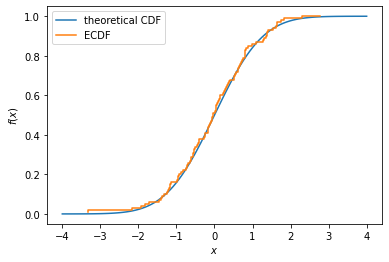

In [16]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

AttributeError: 'Rectangle' object has no property 'normed'

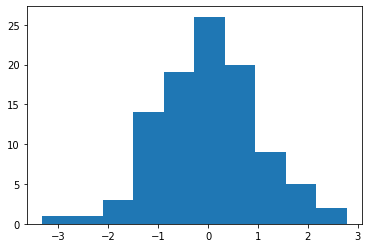

In [17]:
plt.hist(sample, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

In [ ]:
plt.hist(sample, bins=3, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

In [ ]:
plt.hist(sample, bins=40, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

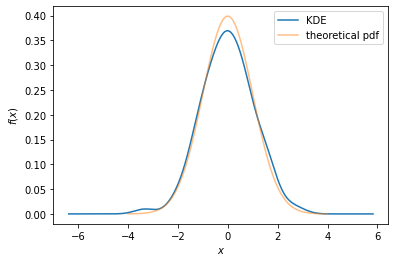

In [18]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

In [ ]:
 aa = np.eye(4, 5)

In [ ]:
aa

In [ ]:
aa[[0, 3], [1, 3]]